In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

In [22]:
iris = pd.read_csv("IRIS.csv")
y = iris['species']

In [23]:
# Original dataset with all 4 features
x = iris.drop(['species'], axis=1)
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [24]:
# Original dataset with 3 features according to entropy feature selection
# x = iris.drop(['species', 'petal_width'], axis=1)
# print(x)

In [25]:
# Avg length width separate
iris_avg_separate = pd.read_csv("binary_Avg_Len_Wid_separate.csv")
# Converting values to decimal
iris_avg_separate['Avg_len_binary'] = iris_avg_separate['Avg_len_binary'].apply(lambda x: int(x, 2))
iris_avg_separate['Avg_wid_binary'] = iris_avg_separate['Avg_wid_binary'].apply(lambda x: int(x, 2))
# x = iris_avg_separate.drop(columns=iris_avg_separate.columns[0], axis=1)
# print(x)

In [26]:
# Avg length width combined
iris_avg = pd.read_csv("binary_Avg_Len_Wid.csv")
# Converting values to decimal
iris_avg['0'] = iris_avg['0'].apply(lambda x: int(x, 2))
# x = iris_avg.drop(columns=iris_avg.columns[0], axis=1)
# print(x)

In [27]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

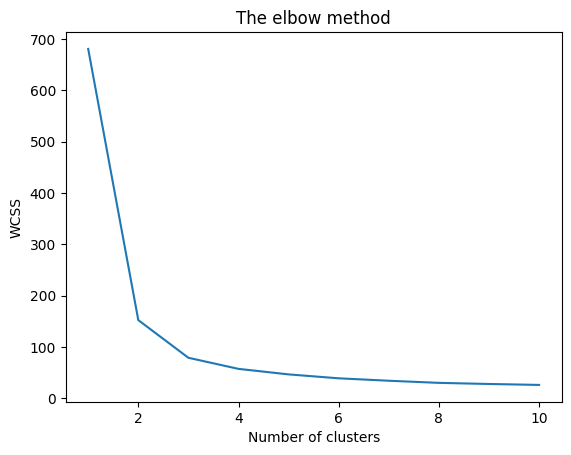

In [28]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(x)

In [30]:
from sklearn import metrics
print('Homogeneity Score: ', metrics.homogeneity_score(y, labels))
print('Completeness Score: ', metrics.completeness_score(y, labels))
print('V Measure Score: ', metrics.v_measure_score(y, labels))

Homogeneity Score:  0.7514854021988339
Completeness Score:  0.7649861514489816
V Measure Score:  0.7581756800057786
